<a href="https://colab.research.google.com/github/rzagni/ML-Models/blob/main/single-cell-binary-classification-nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install ucimlrepo

In [15]:
import numpy as np
import pandas as pd

In [16]:
from ucimlrepo import fetch_ucirepo
iris = fetch_ucirepo(id=53)

In [17]:
iris.data

{'ids': None,
 'features':      sepal length  sepal width  petal length  petal width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 'targets':               class
 0       Iris-setosa
 1       Iris-setosa
 2       Iris-setosa
 3       Iris-setosa
 4       Iris-setosa
 ..              ...
 145  Iris-virginica
 146  Iris-virginica
 147  Iris-virginica
 148  Iris-virgini

In [18]:
iris_df = iris.data.original[0:100]

In [19]:
iris_df = iris_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [20]:
iris_df

,sepal length,sepal width,petal length,petal width,class
0,6.0,2.7,5.1,1.6,Iris-versicolor
1,5.5,2.3,4.0,1.3,Iris-versicolor
2,5.9,3.2,4.8,1.8,Iris-versicolor
3,4.8,3.0,1.4,0.3,Iris-setosa
4,5.1,3.8,1.9,0.4,Iris-setosa
...,...,...,...,...,...
95,5.0,2.0,3.5,1.0,Iris-versicolor
96,6.1,2.8,4.0,1.3,Iris-versicolor
97,5.8,4.0,1.2,0.2,Iris-setosa
98,5.8,2.6,4.0,1.2,Iris-versicolor


In [21]:
X = iris_df[['sepal length', 'petal length']]
y = [0 if label == "Iris-setosa" else 1 for label in iris_df['class']]

In [28]:
Z = 0.0
np.random.seed(42)
w1 = np.random.rand()
w2 = np.random.rand()
b = 0.0
learning_rate = 0.001

for epoch in range(10):
    for i in range(len(X)):
        Z = w1 * X['sepal length'][i] + w2 * X['petal length'][i] + b

        y_hat = 0 if Z > 0 else 1

        grad = y[i] - y_hat

        w1 -= learning_rate * grad * X['sepal length'][i]
        w2 -= learning_rate * grad * X['petal length'][i]
        b -= learning_rate * grad

print(f"Epoch: {epoch}, W1: {w1}, W2: {w2}, b: {b}")

Epoch: 9, W1: 0.009240118847362134, W2: -0.01298569359008332, b: -0.010999999999999996


In [24]:
def predict(X, y, w1, w2, b):
    iris_classes = { 0:"Iris-setosa", 1:"Iris-virginica"}

    Z = w1 * X['sepal length'] + w2 * X['petal length'] + b
    y_hat = 0 if Z > 0 else 1

    print(f"Predicted: {iris_classes[y_hat]} - Actual: {iris_classes[y]}")


In [25]:
predict(X.iloc[4], y[4], w1, w2, b)

Predicted: Iris-setosa - Actual: Iris-setosa


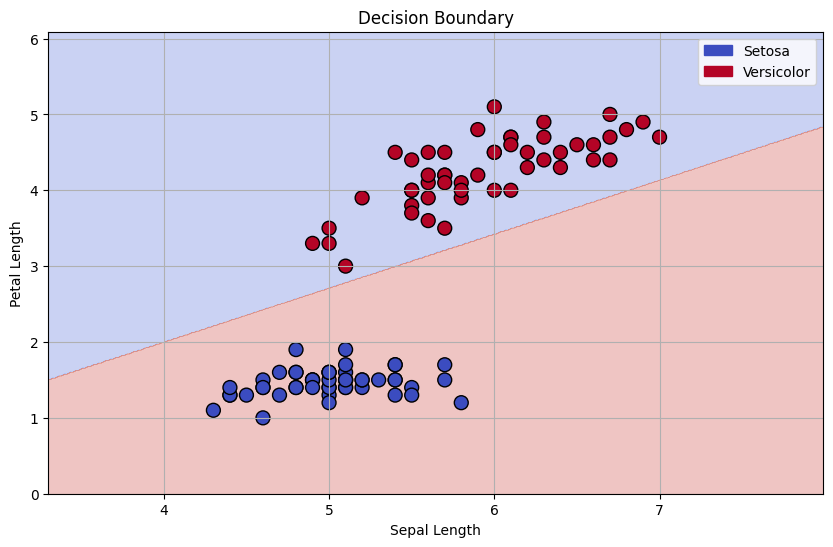

In [26]:
import matplotlib.pyplot as plt

# Plotting the decision boundary
plt.figure(figsize=(10, 6))

# Create a mesh grid for plotting decision boundary
x_min, x_max = X['sepal length'].min() - 1, X['sepal length'].max() + 1
y_min, y_max = X['petal length'].min() - 1, X['petal length'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Calculate decision boundary
Z = w1 * xx + w2 * yy + b
decision_boundary = np.where(Z > 0, 1, 0)

# Plot decision boundary
plt.contourf(xx, yy, decision_boundary, alpha=0.3, cmap='coolwarm')

# Plot the training data points
scatter = plt.scatter(X['sepal length'], X['petal length'], c=y, edgecolor='k', s=100, cmap='coolwarm')

# Class names for legend
plt.title('Decision Boundary')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Create custom legend
from matplotlib import patches
patches = [patches.Patch(color=scatter.cmap(scatter.norm(0)), label='Setosa'),
           patches.Patch(color=scatter.cmap(scatter.norm(1)), label='Versicolor')]
plt.legend(handles=patches)

plt.grid()
plt.show()
